
# Simple AutoEncoders with Image Data

Here is a simple autoencoder with just the dense layers.

Load the data and import the libraries.

In [1]:
#
# Import relevant Libraries
#
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [2]:
from keras.datasets import mnist

In [3]:
from keras.layers import Input, Dense
from keras.models import Model

In [4]:

# Load MNIST data and store it in variables x_train, x_test. Note -  we do not need labels as it's autoencoder.
(x_train,_),(x_test,_) = mnist.load_data()

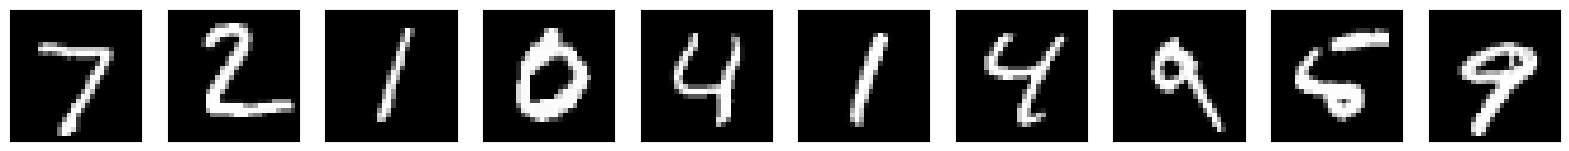

In [5]:
# Plot a few data points
%matplotlib inline

n = 10  # Number of records that will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

In [6]:
# Normalize train data - Divide by 255
# Normalize test data - Divide by 255
x_train = x_train/255
x_test  = x_test/255

## Basic AutoEncoder

Build a basic symmetric encoder-decoder network that recreates the image.  This network could be used in dimensionaliry reduction or feature learning. 

In [10]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten

In [11]:
encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28]))

#
# Add as many hidden layers in the encoder network of your choise
#
#
encoder.add(Dense(500, activation='relu'))
encoder.add(Dense(300, activation='relu'))
encoder.add(Dense(150, activation='relu'))
encoder.add(Dense(50, activation='relu'))
encoder.add(Dense(25, activation='relu'))

# The last TWO layers of the encoder and decoder must be matched (see the following decoder cell.
#

In [12]:
# print the encoder model
encoder.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 500)               392500    
                                                                 
 dense_1 (Dense)             (None, 300)               150300    
                                                                 
 dense_2 (Dense)             (None, 150)               45150     
                                                                 
 dense_3 (Dense)             (None, 50)                7550      
                                                                 
 dense_4 (Dense)             (None, 25)                1275      
                                                                 
Total params: 596775 (2.28 MB)
Trainable params: 59677

In [15]:
from keras.layers import Reshape

In [16]:
decoder = Sequential()
decoder.add(Dense(50,input_shape=[25],activation='relu'))

#
# Add as many layers in the decoder as you want. Reember - Encoder and decoder need to be symmetric.
#
decoder.add(Dense(150, activation='relu'))
decoder.add(Dense(300, activation='relu'))
decoder.add(Dense(500, activation='relu'))

decoder.add(Dense(28 * 28, activation="sigmoid"))
decoder.add(Reshape([28, 28]))

In [17]:
# print the decoder model
decoder.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 50)                1300      
                                                                 
 dense_12 (Dense)            (None, 150)               7650      
                                                                 
 dense_13 (Dense)            (None, 300)               45300     
                                                                 
 dense_14 (Dense)            (None, 500)               150500    
                                                                 
 dense_15 (Dense)            (None, 784)               392784    
                                                                 
 reshape (Reshape)           (None, 28, 28)            0         
                                                                 
Total params: 597534 (2.28 MB)
Trainable params: 59753

In [18]:
autoencoder = Sequential([encoder, decoder]) # Combine encoder and decoder together.


In [19]:
# print the autoencoder model
autoencoder.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 25)                596775    
                                                                 
 sequential_4 (Sequential)   (None, 28, 28)            597534    
                                                                 
Total params: 1194309 (4.56 MB)
Trainable params: 1194309 (4.56 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [32]:
# Compile the autoencoder. Use binary_crossenropy as loss and metrics as accuracy.
autoencoder.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [24]:
#from tensorflow.keras.callbacks import EarlyStopping

In [25]:
#early_stop = EarlyStopping(monitor='val_loss',patience=3)

In [34]:
# Fit the autoencoder. Note - Input and output are same. x_train is your train data, x_test is your validation data.
history = autoencoder.fit( x_train, x_train,
                # the number of times of training using the whole dataset
                    epochs=15,
                    
                    validation_data =(x_test,x_test),
                    
                # Boolean (whether to shuffle the training data before each epoch)
                    shuffle = True,
                
                # 1 = progress bar printing
                    verbose = 1)
                    
                # early stopping    
                    #callbacks=[early_stop] )


Epoch 1/15


1875/1875 [==============================] - 17s 6ms/step - loss: 0.2178 - accuracy: 0.1254 - val_loss: 0.1703 - val_accuracy: 0.1694
Epoch 2/15
1875/1875 [==============================] - 12s 7ms/step - loss: 0.1576 - accuracy: 0.2002 - val_loss: 0.1471 - val_accuracy: 0.2122
Epoch 3/15
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1438 - accuracy: 0.2210 - val_loss: 0.1388 - val_accuracy: 0.2246
Epoch 4/15
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1377 - accuracy: 0.2303 - val_loss: 0.1342 - val_accuracy: 0.2283
Epoch 5/15
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1339 - accuracy: 0.2355 - val_loss: 0.1340 - val_accuracy: 0.2319
Epoch 6/15
1875/1875 [==============================] - 12s 7ms/step - loss: 0.1306 - accuracy: 0.2399 - val_loss: 0.1274 - val_accuracy: 0.2442
Epoch 7/15
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1261 - accuracy: 0.2452 - val_loss: 0.1243 - val_

In [36]:
x_test[i]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

313/313 [==============================] - 0s 1ms/step


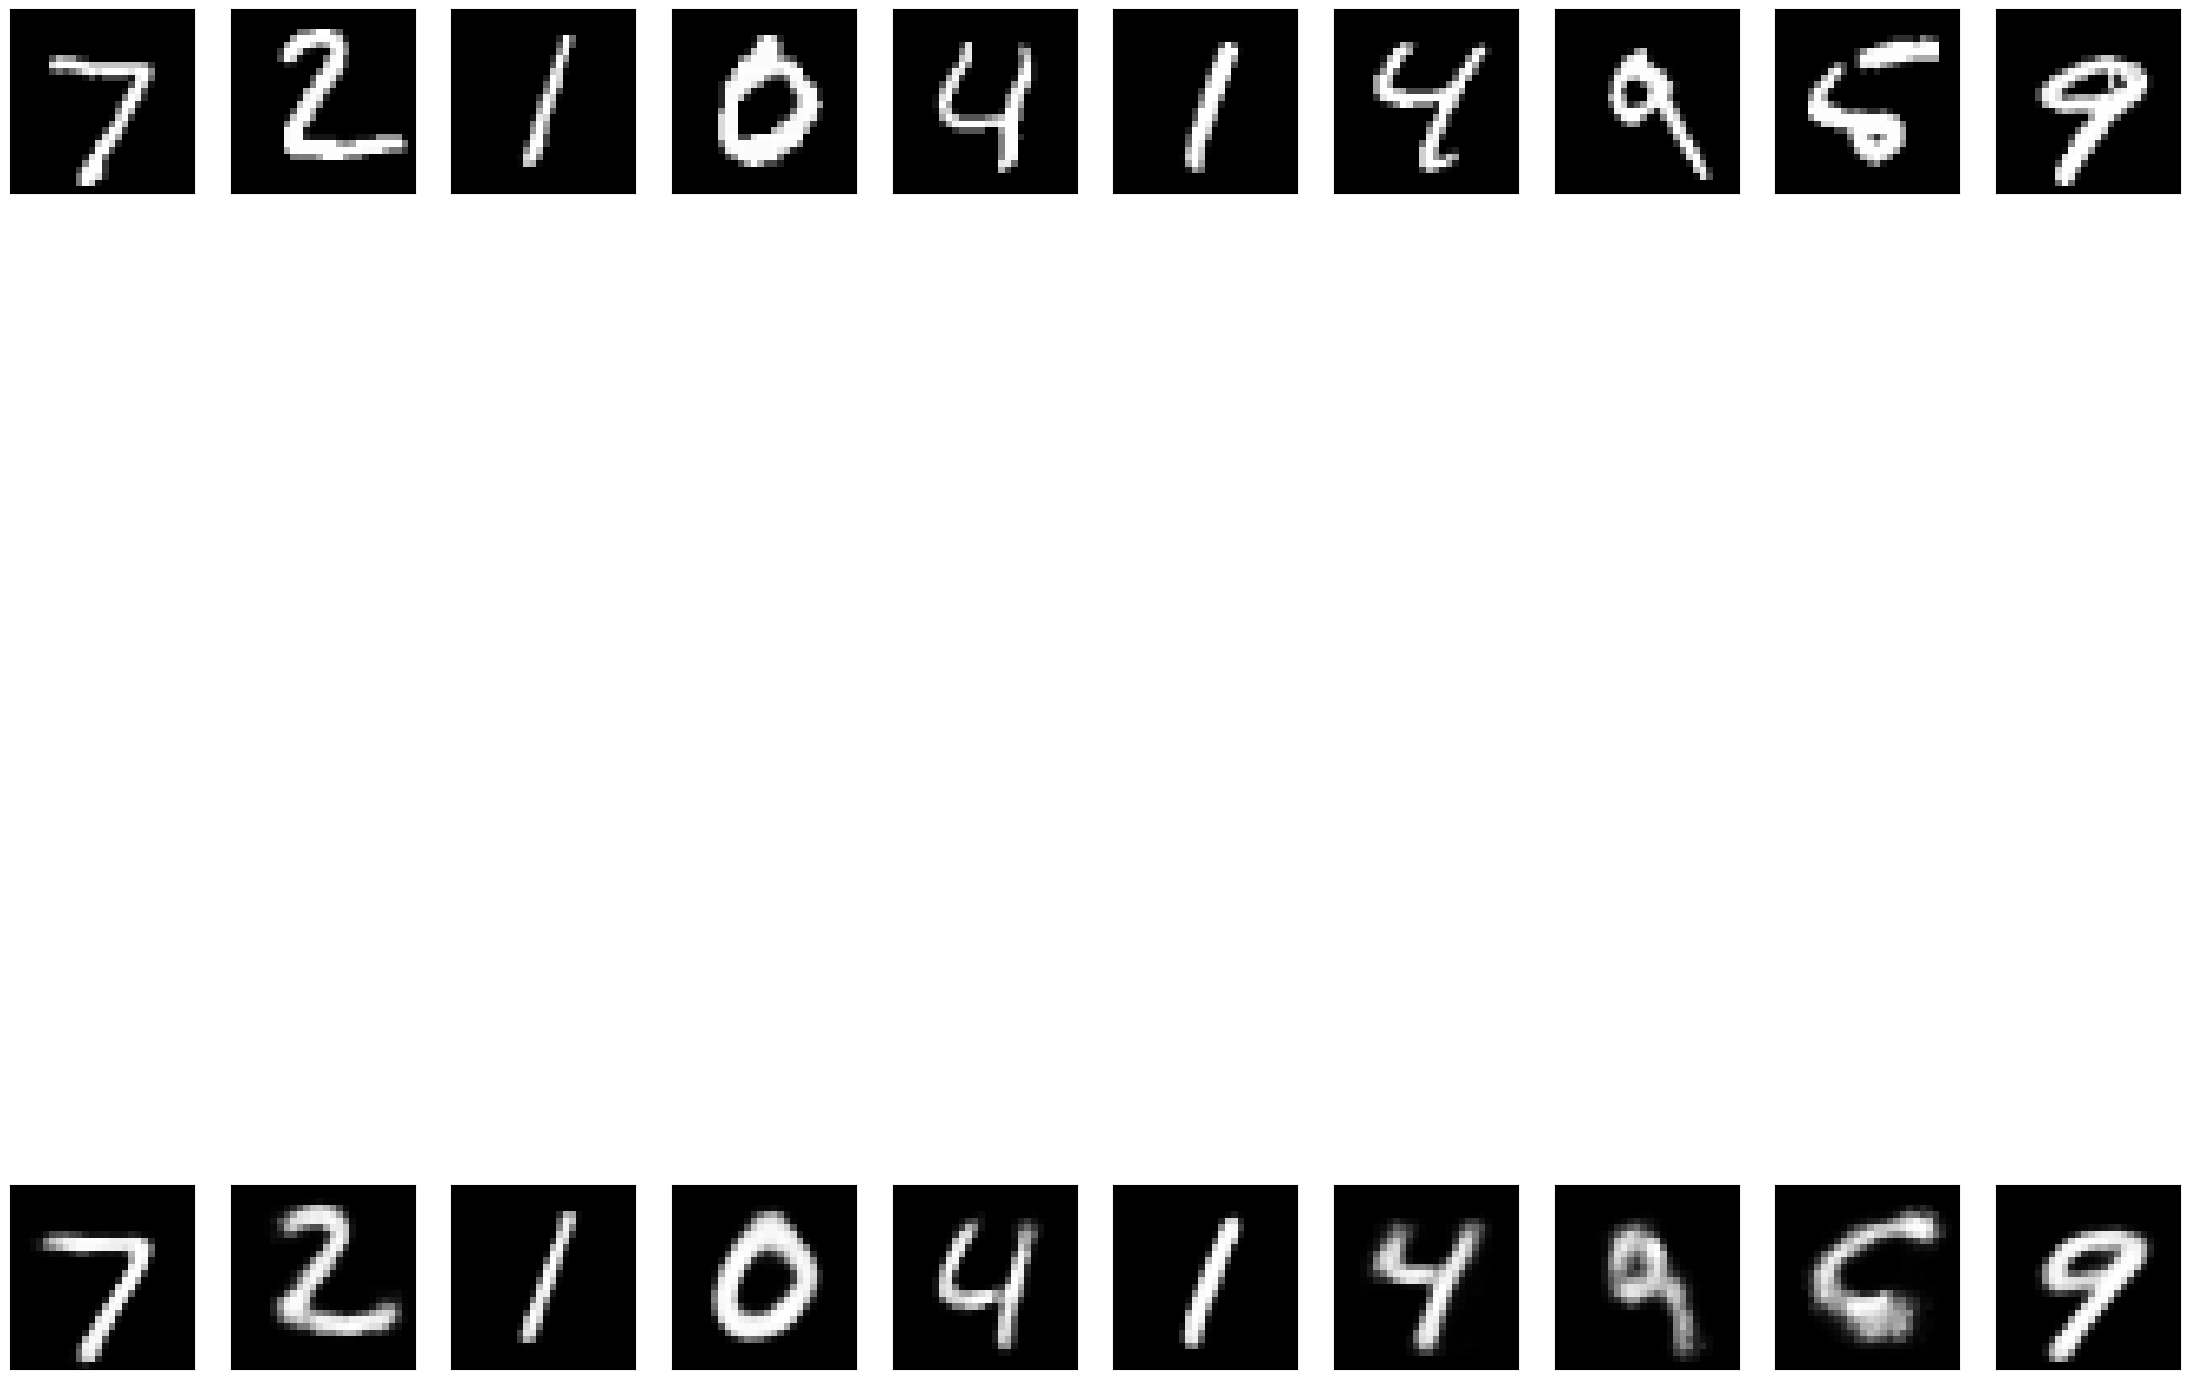

In [38]:
# Check a few sample images.
decoded_imgs = autoencoder.predict(x_test)

n = 10

plt.figure(figsize=(28, 28))

for i in range(n):
    # 
    # Display original image - Just line sample code provided earlier.
    #
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # 
    # Display reconstruced (decoded) images. You need to slightly change your code.
    #
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    
plt.show()

# AutoEncoders for Denoising Images

Use the same digit data set. Add Gaussian noise to it to train an autoencoder that removes noise. Test the noisy samples. 

In [39]:
from tensorflow.keras.layers import GaussianNoise

In [40]:
sample = GaussianNoise(0.2)
noisey = sample(x_test[0:2],training=True)

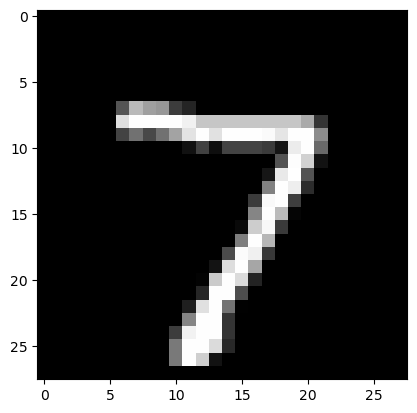

In [41]:
plt.imshow(x_test[0])

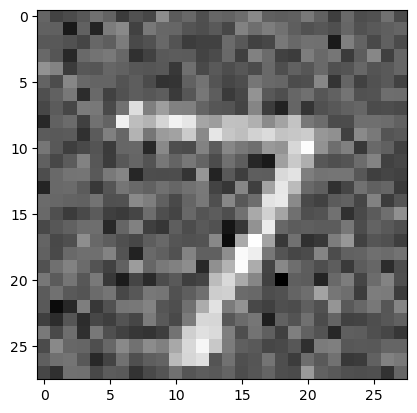

In [42]:
plt.imshow(noisey[0])

### Create  noise removal autoencoder and train it.

# Input - Images with noise
# Labels - Clean images.

In [43]:

encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28]))
encoder.add(GaussianNoise(0.2)) # We are adding noise to make input as noisy image
#
# Add layers of encoder network. You could use same number of layers as earlier.
#

encoder.add(Dense(500, activation='relu'))
encoder.add(Dense(300, activation='relu'))
encoder.add(Dense(150, activation='relu'))
encoder.add(Dense(50, activation='relu'))
encoder.add(Dense(25, activation='relu'))


In [44]:
decoder = Sequential()
decoder.add(Dense(50,input_shape=[25],activation='relu'))

#
# Add layers of decoder network. You could use same number of layers as earlier.
#

decoder.add(Dense(150, activation='relu'))
decoder.add(Dense(300, activation='relu'))
decoder.add(Dense(500, activation='relu'))

decoder.add(Dense(28 * 28, activation="sigmoid"))
decoder.add(Reshape([28, 28]))

In [45]:
noise_remover = Sequential([encoder, decoder])

In [46]:
# Compile the network as earlier
noise_remover.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [47]:
# Fit the network as earlier.
history2 = noise_remover.fit( x_train, x_train,
                # the number of times of training using the whole dataset
                    epochs=15,
                    
                    validation_data =(x_test,x_test),
                    
                # Boolean (whether to shuffle the training data before each epoch)
                    shuffle = True,
                
                # 1 = progress bar printing
                    verbose = 1)
                    
                # early stopping    
                    #callbacks=[early_stop] )

Epoch 1/15
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2297 - accuracy: 0.1089 - val_loss: 0.1867 - val_accuracy: 0.1601
Epoch 2/15
1875/1875 [==============================] - 12s 7ms/step - loss: 0.1704 - accuracy: 0.1824 - val_loss: 0.1511 - val_accuracy: 0.2057
Epoch 3/15
1875/1875 [==============================] - 12s 7ms/step - loss: 0.1480 - accuracy: 0.2123 - val_loss: 0.1385 - val_accuracy: 0.2240
Epoch 4/15
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1378 - accuracy: 0.2271 - val_loss: 0.1304 - val_accuracy: 0.2335
Epoch 5/15
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1312 - accuracy: 0.2359 - val_loss: 0.1244 - val_accuracy: 0.2401
Epoch 6/15
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1265 - accuracy: 0.2439 - val_loss: 0.1235 - val_accuracy: 0.2456
Epoch 7/15
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1233 - accuracy: 0.2481 - val_loss: 0.1207 - val_ac

In [48]:
ten_noisey_images = sample(x_test[0:10],training=True)
denoised = noise_remover(ten_noisey_images[0:10])

The Original


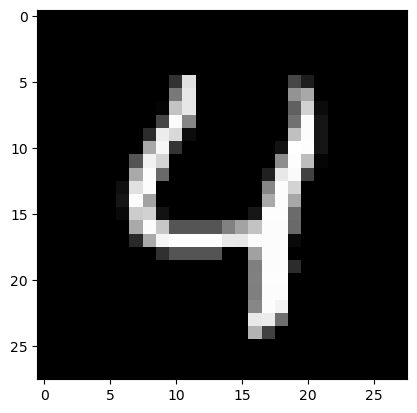

The Noisey Version


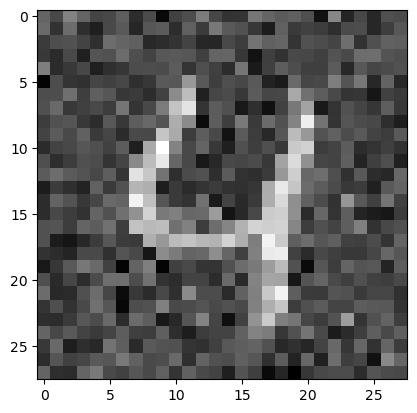

After going through denoiser


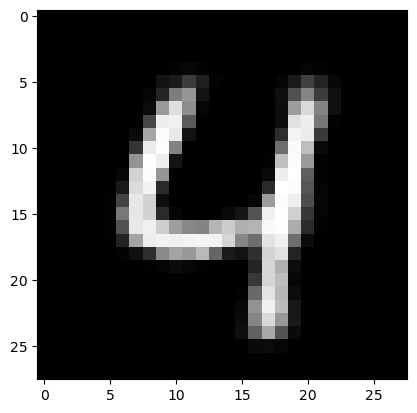

In [49]:
n = 4
print("The Original")
plt.imshow(x_test[n])
plt.show()


print("The Noisey Version")
plt.imshow(ten_noisey_images[n])
plt.show()


print("After going through denoiser")
plt.imshow(denoised[n])
plt.show()

In [50]:
noise_remover.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_6 (Sequential)   (None, 25)                596775    
                                                                 
 sequential_7 (Sequential)   (None, 28, 28)            597534    
                                                                 
Total params: 1194309 (4.56 MB)
Trainable params: 1194309 (4.56 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Lab Logbook requirement:

- Put the model summary for task 1 in you lab logbook.

Ensure that no code or other information is added to the logbook and that only required information is present.  Marks will not be awarded if anything else is found in the logbook or instructions are not clearly followed.

NOTE: DON'T FORGET TO SAVE AND BACK UP YOUR COMPLETED JUPYTER NOTEBOOK AND LAB LOGBOOK ON GITHUB OR ONEDRIVE.